<a href="https://colab.research.google.com/github/IsauraRs/BEDU_Equipo1/blob/master/ProyectoPython/ProyectoEquipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histórico del bitcoin


### Las preguntas que nos hemos planteado para este tema son:
1. ¿Las épocas del año influyen en el valor del bitcoin?
2. ¿De acuerdo a la información que tenemos cuál ha sido su valor más alto y cuál ha sido el menor?
3. ¿En promedio cuántos bitcoins han circulado?

## Se importan las librerías a utilizar

In [10]:
import pandas as pd
import numpy as np


## Se carga el data set que ha sido extraído de https://www.kaggle.com/mczielinski/bitcoin-historical-data

In [11]:
bitcoin_csv = pd.read_csv("/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv", sep = ",")

## Se revisa el tamaño del data frame

In [13]:
bitcoin_csv.shape

(4727777, 8)

## Se revisan los tipos de datos

In [15]:
bitcoin_csv.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [16]:
bitcoin_csv.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
bitcoin_csv.isna()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
4727772,False,False,False,False,False,False,False,False
4727773,False,False,False,False,False,False,False,False
4727774,False,False,False,False,False,False,False,False
4727775,False,False,False,False,False,False,False,False


In [18]:
bitcoin_csv.isna().sum(axis = 0)

Timestamp                  0
Open                 1243472
High                 1243472
Low                  1243472
Close                1243472
Volume_(BTC)         1243472
Volume_(Currency)    1243472
Weighted_Price       1243472
dtype: int64

In [19]:
bitcoin_csv.isna().sum(axis = 1)

0          0
1          7
2          7
3          7
4          7
          ..
4727772    0
4727773    0
4727774    0
4727775    0
4727776    0
Length: 4727777, dtype: int64

In [20]:
bitcoin_csv = bitcoin_csv.apply(pd.to_numeric, errors = 'coerce')
bitcoin_csv = bitcoin_csv.dropna()

## Se verifica que se haya limpiado de los NaN

In [21]:
bitcoin_csv.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


## Se revisa cuántos datos han quedado

In [22]:
bitcoin_csv.shape

(3484305, 8)

## Se resetea el índice

In [23]:

bitcoin_csv = bitcoin_csv.reset_index(drop = True)

In [24]:
bitcoin_csv.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [25]:
bitcoin_csv.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3484300,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
3484301,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
3484302,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
3484303,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
3484304,1609372800,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


## Se cambia el formato de la fecha del formato UNIX



In [26]:
bitcoin_csv['Timestamp'] = pd.to_datetime(bitcoin_csv['Timestamp'], unit = 's')

In [27]:
bitcoin_csv.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

In [28]:
bitcoin_csv

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
3484300,2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
3484301,2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
3484302,2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
3484303,2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831


## Se cambian los nombres de las columnas para que correspondan al formato de python y tengan un nombre más comprensible

In [29]:
bitcoin_csv.columns = ["start_time_of_the_window" , "open_price" , "high_price" , "low_price" , "close_price" , "volume_of_bitcoins_transacted" , "volume_of_corresponding_currency_transacted" , "volume_weighted_average_price"]

## Se añade una columna que incluye solo la fecha

In [30]:
bitcoin_csv["start_date"] = [d.date() for d in bitcoin_csv['start_time_of_the_window']]

## Se añade una columna solo con el tiempo

In [31]:
bitcoin_csv["start_time"] = [d.time() for d in bitcoin_csv['start_time_of_the_window']] 

In [32]:
bitcoin_csv

,start_time_of_the_window,open_price,high_price,low_price,close_price,volume_of_bitcoins_transacted,volume_of_corresponding_currency_transacted,volume_weighted_average_price,start_date,start_time
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,07:52:00
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31,15:50:00
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31,16:59:00
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31,17:00:00
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01,04:16:00
...,...,...,...,...,...,...,...,...,...,...
3484300,2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798,2020-12-30,23:56:00
3484301,2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863,2020-12-30,23:57:00
3484302,2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266,2020-12-30,23:58:00
3484303,2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831,2020-12-30,23:59:00


In [33]:
bitcoin_csv.head()

,start_time_of_the_window,open_price,high_price,low_price,close_price,volume_of_bitcoins_transacted,volume_of_corresponding_currency_transacted,volume_weighted_average_price,start_date,start_time
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31,07:52:00
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31,15:50:00
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31,16:59:00
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31,17:00:00
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01,04:16:00


In [34]:
bitcoin_csv.tail()

,start_time_of_the_window,open_price,high_price,low_price,close_price,volume_of_bitcoins_transacted,volume_of_corresponding_currency_transacted,volume_weighted_average_price,start_date,start_time
3484300,2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798,2020-12-30,23:56:00
3484301,2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863,2020-12-30,23:57:00
3484302,2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266,2020-12-30,23:58:00
3484303,2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831,2020-12-30,23:59:00
3484304,2020-12-31 00:00:00,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061,2020-12-31,00:00:00


# Para contestar la pregunta planteada en segundo lugar realizamos lo siguiente:

## Se examinan los valores mayores

In [35]:
bitcoin_csv.max()

start_time_of_the_window                       2020-12-31 00:00:00
open_price                                                 28997.4
high_price                                                 29010.3
low_price                                                  28963.7
close_price                                                28997.4
volume_of_bitcoins_transacted                              5853.85
volume_of_corresponding_currency_transacted             1.0446e+07
volume_weighted_average_price                              28985.9
start_date                                              2020-12-31
start_time                                                23:59:00
dtype: object

## Se examinan los valores menores 

In [36]:
bitcoin_csv.min()

start_time_of_the_window                       2011-12-31 07:52:00
open_price                                                     3.8
high_price                                                     3.8
low_price                                                      1.5
close_price                                                    1.5
volume_of_bitcoins_transacted                                    0
volume_of_corresponding_currency_transacted                      0
volume_weighted_average_price                                  3.8
start_date                                              2011-12-31
start_time                                                00:00:00
dtype: object

## Se intentó utilizar esta API para complementar la información, sin embargo el código obtenido fue 404, 

In [37]:
!pip install requests

In [38]:
import requests

In [39]:
endpoint = "https://api.blockchain.com/v3/exchange"
payload = {"MGY4MDA5NTIwZjQxNGIzOTgwMmRmMjA2YzgwNGNmNWY"}


In [41]:
r = requests.get(endpoint,params=payload)

ValueError: ignored

In [42]:
r.status_code

404

In [277]:
json_var = r.json()

JSONDecodeError: ignored

## Cantidad de bitcoins (en promedio) de 2011 a 2020

In [43]:
bitcoin_csv["volume_of_bitcoins_transacted"].mean()

9.42267649722517

In [47]:
bitcoin_csv.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


open_price                                     3085.010000
high_price                                     3093.250000
low_price                                      3078.010000
close_price                                    3084.410000
volume_of_bitcoins_transacted                     1.936719
volume_of_corresponding_currency_transacted    3305.199178
volume_weighted_average_price                  3085.477527
dtype: float64

## Se realizó un gráfico de la fecha contra el precio ponderado promedio en la que se puede observar que actualmente se espera continúe incrementando su valor

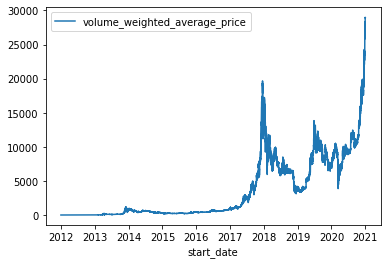

In [66]:
bitcoin_csv.plot(x = "start_date", y = "volume_weighted_average_price")

## Se agrega una columna donde solo se contenga el año

In [67]:
bitcoin_csv["year"] = pd.to_datetime(bitcoin_csv["start_time_of_the_window"].astype(str)).dt.year

In [68]:
bitcoin_csv.head(2)

,start_time_of_the_window,open_price,high_price,low_price,close_price,volume_of_bitcoins_transacted,volume_of_corresponding_currency_transacted,volume_weighted_average_price,start_date,start_time,year
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,2011-12-31,07:52:00,2011
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.72,4.39,2011-12-31,15:50:00,2011


## Se realiza un dataframe por año

In [81]:
df_2011 = bitcoin_csv[bitcoin_csv["year"] == 2011]


In [82]:
df_2012 = bitcoin_csv[bitcoin_csv["year"] == 2012]

In [84]:
df_2013 = bitcoin_csv[bitcoin_csv["year"] == 2013]

In [85]:
df_2014 = bitcoin_csv[bitcoin_csv["year"] == 2014]

In [86]:
df_2015 = bitcoin_csv[bitcoin_csv["year"] == 2015]

In [87]:
df_2016 = bitcoin_csv[bitcoin_csv["year"] == 2016]

In [88]:
df_2017 = bitcoin_csv[bitcoin_csv["year"] == 2017]

In [89]:
df_2018 = bitcoin_csv[bitcoin_csv["year"] == 2018]

In [90]:
df_2019 = bitcoin_csv[bitcoin_csv["year"] == 2019]

In [91]:
df_2020 = bitcoin_csv[bitcoin_csv["year"] == 2020]

## En busca de una tendencia de alguna época del año que influya en el precio del bitcoin se realizó una grafica por año

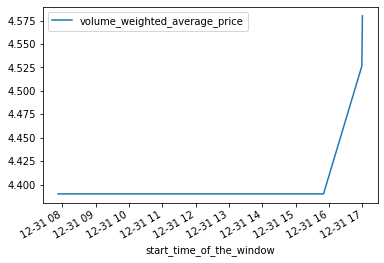

In [93]:
df_2011.plot(x = "start_time_of_the_window", y = "volume_weighted_average_price")

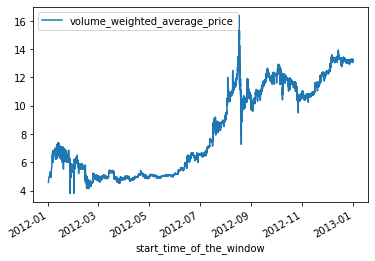

In [94]:
df_2012.plot(x = "start_time_of_the_window", y = "volume_weighted_average_price")

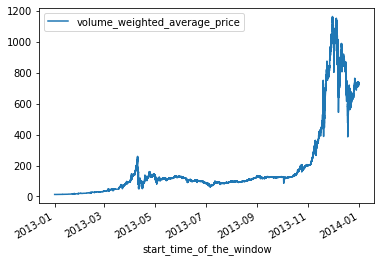

In [95]:
df_2013.plot(x = "start_time_of_the_window", y = "volume_weighted_average_price")

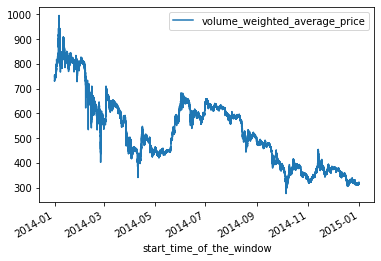

In [96]:
df_2014.plot(x = "start_time_of_the_window", y = "volume_weighted_average_price")

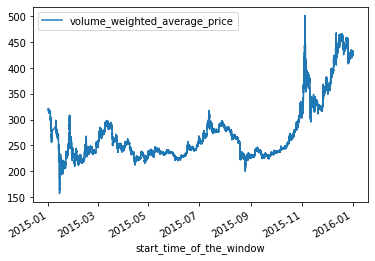

In [97]:
df_2015.plot(x = "start_time_of_the_window", y = "volume_weighted_average_price")

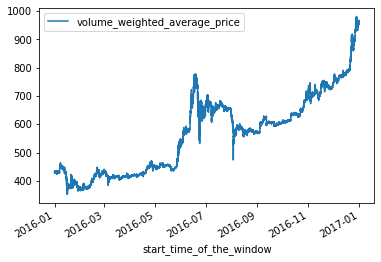

In [98]:
df_2016.plot(x = "start_time_of_the_window", y = "volume_weighted_average_price")

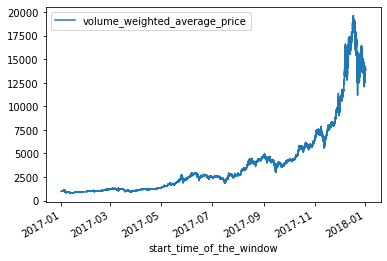

In [99]:
df_2017.plot(x = "start_time_of_the_window", y = "volume_weighted_average_price")

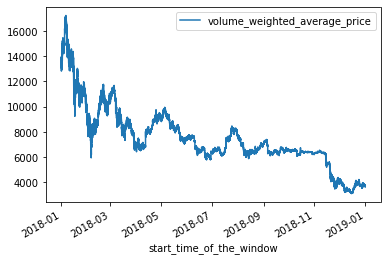

In [100]:
df_2018.plot(x = "start_time_of_the_window", y = "volume_weighted_average_price")

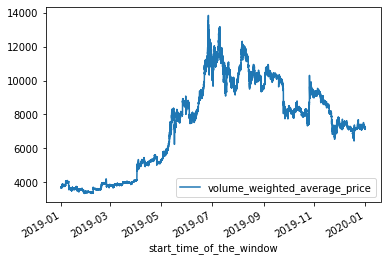

In [101]:
df_2019.plot(x = "start_time_of_the_window", y = "volume_weighted_average_price")

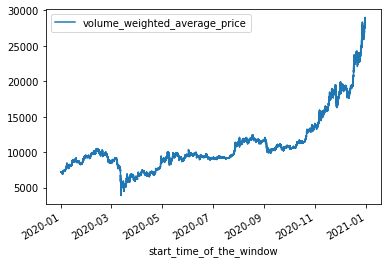

In [102]:
df_2020.plot(x = "start_time_of_the_window", y = "volume_weighted_average_price")

## Sin embargo, no se encontró alguna tendencia que indique la influencia de cierto periodo del año en el precio